# WeatherPy
----

#### Observable Trends

1. Data confirms that max temperature increases as we move closer to Earth's equator. The equator receives the most direct sunlight therefore most solar energy resulting in higher average temperatures. 

2. There is no strong correlation between wind speed and latitude. Plots below show that there are cities with similar wind speeds regardless of the latitude. 

3. Cloudiness % and humidity % do not show a very strong correlation to latitude of the city. Scatter plots below show that there's a variety of values for both cloudiness and humidity along similar latitudes. Perhaps these two values are influenced by a culmination of geological details and not solely dependent on latitude.  

In [1]:
# Dependencies! 
from citipy import citipy
import pandas as pd
import numpy as np
import json 
import requests
import gmaps
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress

from api_keys import g_key
from api_keys import weather_api_key

In [2]:
places = pd.DataFrame({'lat':(np.random.uniform(-0.90, 0.90, 1500) * 100),
                       'long':(np.random.uniform(-1.80, 1.80, 1500) * 100)})
places.head()

,lat,long
0,-66.111381,-62.381581
1,-85.482679,-91.877624
2,46.010548,179.398360
3,26.341036,-177.780927
4,-44.705108,142.394687


## Generate Cities List

In [3]:
cities = []
code = []

for i in range(0,len(places['lat'])):
    lat = places.iloc[i]['lat']
    long = places.iloc[i]["long"]
    city = citipy.nearest_city(lat,long)
    name = city.city_name
    cities.append(name)
    country = city.country_code
    code.append(country)
    
        
places['City'] = cities
places['Country'] = code
places.head()

places = places.drop_duplicates("City", keep='first')
print(f"There are {len(places)} cities.")

places.head()

There are 603 cities.


,lat,long,City,Country
0,-66.111381,-62.381581,ushuaia,ar
1,-85.482679,-91.877624,punta arenas,cl
2,46.010548,179.398360,nikolskoye,ru
3,26.341036,-177.780927,kapaa,us
4,-44.705108,142.394687,new norfolk,au


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# What do we need...?
# Temperature (F) vs. Latitude
# Humidity (%) vs. Latitude
# Cloudiness (%) vs. Latitude
# Wind Speed (mph) vs. Latitude

count = 1
thecity = []
country = []
lat = []
long = []
temp = []
humidity = []
clouds = []
date = []
wind_speed = []


print('''
═════════════════════════════════════════
🌡 Beginning retrieval of weather data...
═════════════════════════════════════════''')

for place in places['City']:    

    print(f"Retreiving data for city ID {count} which is the city of {place}.")
    
    count = count + 1
    query_url = ("http://api.openweathermap.org/data/2.5/weather?"
                 'appid={0}&q={1}').format(weather_api_key, place)
    
    try:
        response = requests.get(query_url).json()            
        thecity.append(response['name'])
        country.append(response['sys']['country'])
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        date.append(response['dt'])
        wind_speed.append(response['wind']['speed'])

    except:
        print("Data retrieval failed. Thank you, next!")

print('''
═══════════════════════════
Data Retrival Complete! 🌤 
═══════════════════════════''')



═════════════════════════════════════════
🌡 Beginning retrieval of weather data...
═════════════════════════════════════════
Retreiving data for city ID 1 which is the city of ushuaia.
Retreiving data for city ID 2 which is the city of punta arenas.
Retreiving data for city ID 3 which is the city of nikolskoye.
Retreiving data for city ID 4 which is the city of kapaa.
Retreiving data for city ID 5 which is the city of new norfolk.
Retreiving data for city ID 6 which is the city of faanui.
Retreiving data for city ID 7 which is the city of thompson.
Retreiving data for city ID 8 which is the city of rikitea.
Retreiving data for city ID 9 which is the city of ulaangom.
Retreiving data for city ID 10 which is the city of atuona.
Retreiving data for city ID 11 which is the city of bambous virieux.
Retreiving data for city ID 12 which is the city of progreso.
Retreiving data for city ID 13 which is the city of ostrovskoye.
Retreiving data for city ID 14 which is the city of tuktoyaktuk.
Re

Retreiving data for city ID 122 which is the city of palmer.
Retreiving data for city ID 123 which is the city of amderma.
Data retrieval failed. Thank you, next!
Retreiving data for city ID 124 which is the city of taltal.
Retreiving data for city ID 125 which is the city of saleaula.
Data retrieval failed. Thank you, next!
Retreiving data for city ID 126 which is the city of boyolangu.
Retreiving data for city ID 127 which is the city of puerto ayora.
Retreiving data for city ID 128 which is the city of chuy.
Retreiving data for city ID 129 which is the city of rani.
Retreiving data for city ID 130 which is the city of kitimat.
Retreiving data for city ID 131 which is the city of lebu.
Retreiving data for city ID 132 which is the city of umm kaddadah.
Retreiving data for city ID 133 which is the city of lima.
Retreiving data for city ID 134 which is the city of tiksi.
Retreiving data for city ID 135 which is the city of san patricio.
Retreiving data for city ID 136 which is the city 

Retreiving data for city ID 245 which is the city of mungwi.
Retreiving data for city ID 246 which is the city of vostok.
Retreiving data for city ID 247 which is the city of novopavlovka.
Retreiving data for city ID 248 which is the city of longyearbyen.
Retreiving data for city ID 249 which is the city of cabo san lucas.
Retreiving data for city ID 250 which is the city of ancud.
Retreiving data for city ID 251 which is the city of mudgee.
Retreiving data for city ID 252 which is the city of valparaiso.
Retreiving data for city ID 253 which is the city of staunton.
Retreiving data for city ID 254 which is the city of kushiro.
Retreiving data for city ID 255 which is the city of acapulco.
Retreiving data for city ID 256 which is the city of sioux lookout.
Retreiving data for city ID 257 which is the city of haibowan.
Data retrieval failed. Thank you, next!
Retreiving data for city ID 258 which is the city of san rafael.
Retreiving data for city ID 259 which is the city of mayo.
Retrei

Retreiving data for city ID 369 which is the city of shirgaon.
Retreiving data for city ID 370 which is the city of sabha.
Retreiving data for city ID 371 which is the city of basoko.
Retreiving data for city ID 372 which is the city of talnakh.
Retreiving data for city ID 373 which is the city of bakau.
Retreiving data for city ID 374 which is the city of yar-sale.
Retreiving data for city ID 375 which is the city of ust-omchug.
Retreiving data for city ID 376 which is the city of bundaberg.
Retreiving data for city ID 377 which is the city of fairbanks.
Retreiving data for city ID 378 which is the city of puerto escondido.
Retreiving data for city ID 379 which is the city of banda aceh.
Retreiving data for city ID 380 which is the city of akdepe.
Retreiving data for city ID 381 which is the city of tazovskiy.
Retreiving data for city ID 382 which is the city of chara.
Retreiving data for city ID 383 which is the city of santos dumont.
Retreiving data for city ID 384 which is the city

Data retrieval failed. Thank you, next!
Retreiving data for city ID 493 which is the city of gao.
Retreiving data for city ID 494 which is the city of kamaishi.
Retreiving data for city ID 495 which is the city of arbagar.
Retreiving data for city ID 496 which is the city of pozo colorado.
Retreiving data for city ID 497 which is the city of bagdarin.
Retreiving data for city ID 498 which is the city of san jeronimo.
Retreiving data for city ID 499 which is the city of zhangjiakou.
Retreiving data for city ID 500 which is the city of labe.
Retreiving data for city ID 501 which is the city of gbarnga.
Retreiving data for city ID 502 which is the city of fauske.
Retreiving data for city ID 503 which is the city of lodja.
Retreiving data for city ID 504 which is the city of parabel.
Retreiving data for city ID 505 which is the city of mandalgovi.
Retreiving data for city ID 506 which is the city of saint-joseph.
Retreiving data for city ID 507 which is the city of tucuma.
Retreiving data 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
rawdata = pd.DataFrame({"Latitude": lat,
                        "Longitude": long,
                        "City": thecity,
                        "Country": country,
                        "Max Temp": temp,
                        "Humidity": humidity,
                        "Cloudiness": clouds,
                        "Date": date,
                        "Wind Speed": wind_speed
})

# Export that stuff.
rawdata.to_csv("city_data.csv", index = False)

data = pd.read_csv("city_data.csv")
data.head()

,Latitude,Longitude,City,Country,Max Temp,Humidity,Cloudiness,Date,Wind Speed
0,-54.80,-68.30,Ushuaia,AR,278.15,75,40,1601940667,5.10
1,-53.15,-70.92,Punta Arenas,CL,277.15,72,40,1601940667,7.20
2,59.70,30.79,Nikolskoye,RU,287.59,87,20,1601940667,3.00
3,22.08,-159.32,Kapaa,US,304.15,62,40,1601940667,5.10
4,-42.78,147.06,New Norfolk,AU,283.71,72,2,1601940668,3.58


In [6]:
# Correct temperature and check humidity
farenheit = [(9/5) * (t-273) + 32 for t in data["Max Temp"]]
data["Max Temp"] = farenheit
data.head()

,Latitude,Longitude,City,Country,Max Temp,Humidity,Cloudiness,Date,Wind Speed
0,-54.80,-68.30,Ushuaia,AR,41.270,75,40,1601940667,5.10
1,-53.15,-70.92,Punta Arenas,CL,39.470,72,40,1601940667,7.20
2,59.70,30.79,Nikolskoye,RU,58.262,87,20,1601940667,3.00
3,22.08,-159.32,Kapaa,US,88.070,62,40,1601940667,5.10
4,-42.78,147.06,New Norfolk,AU,51.278,72,2,1601940668,3.58


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
data["Humidity"].max()

100

In [8]:
# No cities that have humidity over 100% :D

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## 🌡 Latitude vs. Temperature Plot 

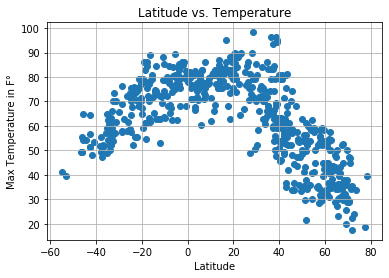

In [9]:
plt.scatter(data["Latitude"], data["Max Temp"], marker = "o")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature in F°")
plt.title("Latitude vs. Temperature")
plt.savefig("lat_vs_temp.png")
plt.grid()
plt.show()

Latitude vs. temperature plot captures the max temperature of cities and plots them against their location. It seems that the more extreme the latitude, the lower max temperature. Temperature is highest around -20° to 40° latitude. 

## ☁ Latitude vs. Humidity Plot

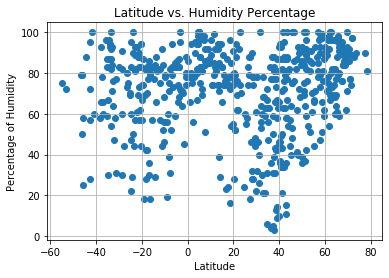

In [10]:
plt.scatter(data["Latitude"], data["Humidity"], marker = "o")
plt.xlabel("Latitude")
plt.ylabel("Percentage of Humidity")
plt.title("Latitude vs. Humidity Percentage")
plt.savefig("lat_vs_humid.png")
plt.grid()
plt.show()

Latitude vs. humidity plot shows the humidity % in conjunction to the latitude of the city. There is a wide range of humidity among cities with similar latitudes, so it's difficult to come to a conclusion about the correlation.

## 🌥 Latitude vs. Cloudiness Plot

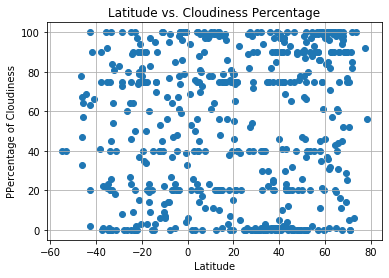

In [11]:
plt.scatter(data["Latitude"], data["Cloudiness"], marker = "o")
plt.xlabel("Latitude")
plt.ylabel("PPercentage of Cloudiness")
plt.title("Latitude vs. Cloudiness Percentage")
plt.savefig("lat_vs_cloud.png")
plt.grid()
plt.show()

Latitude vs. cloudiness plot shows the cloud % with respect to the city's location. These two variables do not seem to have any correlation.

## 🌫 Latitude vs. Wind Speed Plot

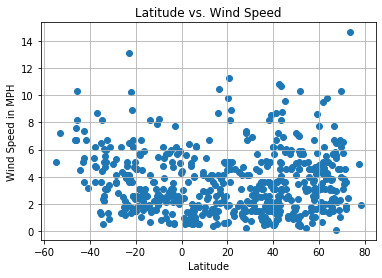

In [12]:
plt.scatter(data["Latitude"], data["Wind Speed"], marker = "o")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed in MPH")
plt.title("Latitude vs. Wind Speed")
plt.savefig("lat_vs_wind.png")
plt.grid()
plt.show()

Latitude vs. wind speed plot shows the wind speed in MPH per city. There also does not seem to be a strong correlation here.

## Linear Regression

In [13]:
# Northern and Southern hemispheres

northern = data.loc[data["Latitude"] >= 0]
southern = data.loc[data["Latitude"] <= 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

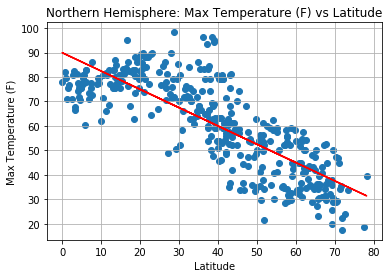

In [14]:
x_val = northern['Latitude']
y_val = northern['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_val, y_val)
plt.plot(x_val,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere: Max Temperature (F) vs Latitude')
plt.savefig('northern_latitude_vs_temp.png')
plt.grid()
plt.show()

Linear regression shows that there is strong correlation between higher max temperature and lower latitude in the Northern Hemisphere. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

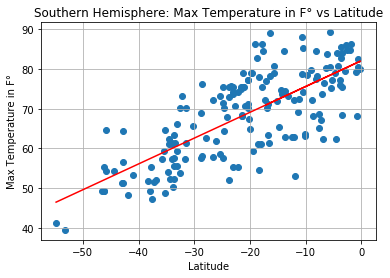

In [15]:
x_val = southern['Latitude']
y_val = southern['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_val, y_val)
plt.plot(x_val,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature in F°')
plt.title('Southern Hemisphere: Max Temperature in F° vs Latitude')
plt.savefig('southern_latitude_vs_temp.png')
plt.grid()
plt.show()

Linear regression shows that there is correlation between higher max temperature and higher latitude in the Southern Hemisphere. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

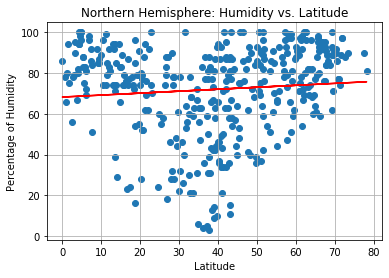

In [16]:
x_val = northern['Latitude']
y_val = northern['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_val, y_val)
plt.plot(x_val,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Percentage of Humidity')
plt.title('Northern Hemisphere: Humidity vs. Latitude')
plt.savefig('northern_latitude_humidity.png')
plt.grid()
plt.show()

Linear regression does not show particular trends indicating a correlation between humidity and latitude. There is little ability to predict. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

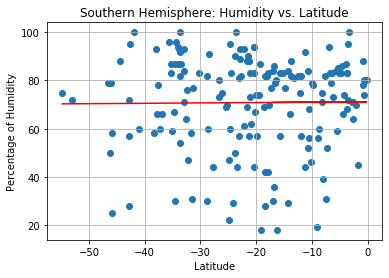

In [17]:
x_val = southern['Latitude']
y_val = southern['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_val, y_val)
plt.plot(x_val,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Percentage of Humidity')
plt.title('Southern Hemisphere: Humidity vs. Latitude')
plt.savefig('southern_latitude_humidity.png')
plt.grid()
plt.show()

Linear regression does not show particular trends indicating a correlation between humidity and latitude. There is little ability to predict. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

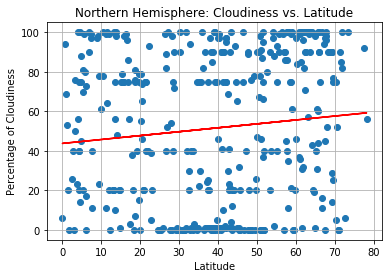

In [18]:
x_val = northern['Latitude']
y_val = northern['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_val, y_val)
plt.plot(x_val,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Percentage of Cloudiness')
plt.title('Northern Hemisphere: Cloudiness vs. Latitude')
plt.savefig('northern_latitude_cloud.png')
plt.grid()
plt.show()

Linear regression does not show particular trends indicating a correlation between cloudiness and latitude. There is little ability to predict. 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

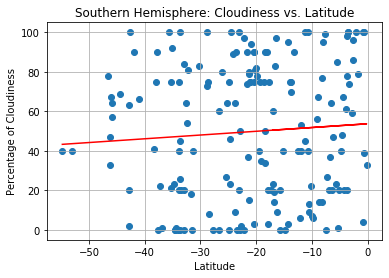

In [19]:
x_val = southern['Latitude']
y_val = southern['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_val, y_val)
plt.plot(x_val,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Percentage of Cloudiness')
plt.title('Southern Hemisphere: Cloudiness vs. Latitude')
plt.savefig('southern_latitude_cloud.png')
plt.grid()
plt.show()

Linear regression does not show particular trends indicating a correlation between cloudiness and latitude. There is little ability to predict. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

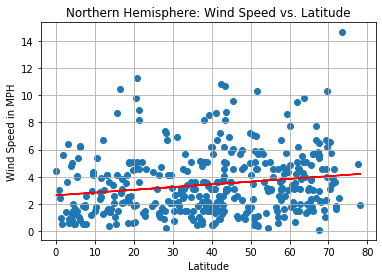

In [20]:
x_val = northern['Latitude']
y_val = northern['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_val, y_val)
plt.plot(x_val,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed in MPH')
plt.title('Northern Hemisphere: Wind Speed vs. Latitude')
plt.savefig('southern_latitude_windspeed.png')
plt.grid()
plt.show()

Linear regression does not show particular trends indicating a correlation between wind speed and latitude. There is little ability to predict. 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

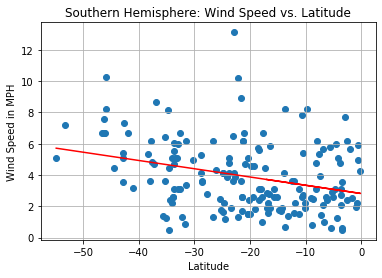

In [21]:
x_val = southern['Latitude']
y_val = southern['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_val, y_val)
plt.plot(x_val,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed in MPH')
plt.title('Southern Hemisphere: Wind Speed vs. Latitude')
plt.savefig('southern_latitude_windspeed.png')
plt.grid()
plt.show()

Linear regression does not show particular trends indicating a correlation between wind speed and latitude. There is little ability to predict. More city data within the -90° to 0° latitude is needed for more accurate analysis. 